In [1]:
from libraries import lib
from libraries.NeuralStates import *
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [2]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
one_one = KAN(width=[1, 1], device=device)
sigmoid_dataset = create_dataset(sigmoid, n_var=1, device=device,ranges=[-5, 5])

checkpoint directory created: ./model
saving model version 0.0


In [4]:
max(np.array(sigmoid_dataset['train_input']))

C:\Users\taoha\AppData\Local\Temp\ipykernel_29204\3092808009.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  max(np.array(sigmoid_dataset['train_input']))


array([4.9983816], dtype=float32)

In [5]:
sigmoid_dataset['train_input'].shape, sigmoid_dataset['train_label'].shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

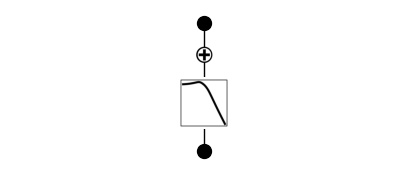

In [6]:
one_one(sigmoid_dataset['train_input'])
one_one.plot()

In [7]:
one_one.fit(sigmoid_dataset, opt="LBFGS", steps=200);

| train_loss: 4.22e-03 | test_loss: 4.12e-03 | reg: 1.56e+00 | : 100%|█| 200/200 [00:06<00:00, 28.60

saving model version 0.1


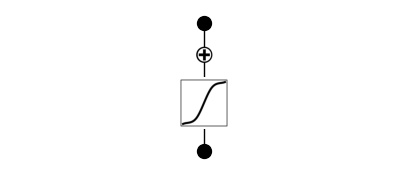

In [8]:
one_one.plot()

In [9]:
one_one.suggest_symbolic(0, 0, 0);

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0     tanh    0.999892 -13.045969           3                3   -0.209194
1      cos    0.997242  -8.496927           2                2   -0.099385
2      sin    0.997242  -8.496896           2                2   -0.099379
3        x    0.947215  -4.243444           1                1   -0.048689
4        0    0.000000   0.000014           0                0    0.000003


In [10]:
one_one.fix_symbolic(0, 0, 0, 'tanh')
one_one.fit(sigmoid_dataset, opt="LBFGS", steps=200);

r2 is 0.9998917579650879
saving model version 0.2


| train_loss: 2.86e-08 | test_loss: 2.70e-08 | reg: 0.00e+00 | : 100%|█| 200/200 [00:04<00:00, 45.07


saving model version 0.3


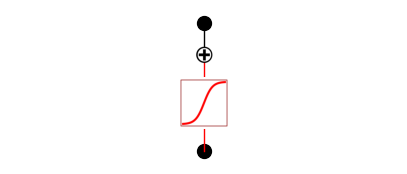

In [11]:
one_one.plot()

In [12]:
ex_round(one_one.symbolic_formula()[0][0], 2)

0.5*tanh(0.5*x_1) + 0.5

In [13]:
def selu(x):
    return x / (1 + torch.exp(-x))
selu_dataset = create_dataset(selu, n_var=1, ranges=[-5, 5])

In [14]:
selu_dataset

{'train_input': tensor([[-3.7434e-02],
         [ 2.6822e+00],
         [-4.1152e+00],
         [-3.6797e+00],
         [-1.9258e+00],
         [ 1.3408e+00],
         [-9.9066e-02],
         [ 3.9644e+00],
         [-4.4372e-01],
         [ 1.3231e+00],
         [-1.5111e+00],
         [-9.8283e-01],
         [-4.7767e+00],
         [-3.3114e+00],
         [-2.0611e+00],
         [ 1.8522e-01],
         [ 1.9767e+00],
         [ 3.0001e+00],
         [-3.3897e+00],
         [-2.1773e+00],
         [ 1.8161e+00],
         [ 4.1519e+00],
         [-1.0290e+00],
         [ 3.7416e+00],
         [-8.0592e-01],
         [ 5.2907e-01],
         [ 4.5274e+00],
         [-4.6384e+00],
         [-3.1477e+00],
         [-1.2658e+00],
         [-1.9490e+00],
         [ 4.3200e+00],
         [-3.2409e+00],
         [-2.3017e+00],
         [-3.4932e+00],
         [-4.6828e+00],
         [-2.9187e+00],
         [ 4.2980e+00],
         [ 2.2311e+00],
         [ 2.4234e+00],
         [ 2.6296e-01],
 

checkpoint directory created: ./model
saving model version 0.0


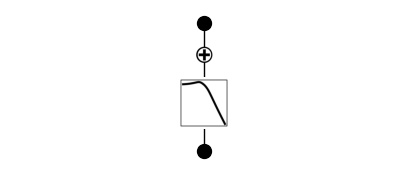

In [15]:
selu_model = KAN(width=[1, 1], device=device)
selu_model(selu_dataset['train_input'])
selu_model.plot()

In [16]:
selu_model.fit(selu_dataset, opt="LBFGS", steps=200);

| train_loss: 1.05e-08 | test_loss: 1.80e-08 | reg: 2.67e+00 | : 100%|█| 200/200 [00:05<00:00, 39.35

saving model version 0.1


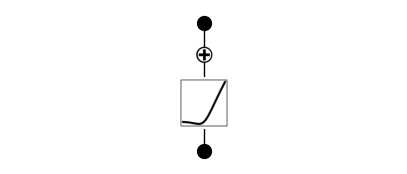

In [17]:
selu_model.plot()

In [18]:
selu_model.suggest_symbolic(0, 0, 0);

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1      cos    0.991313 -6.845224           2                2    0.230955
2      sin    0.991313 -6.845204           2                2    0.230959
3      x^2    0.990902 -6.778651           2                2    0.244270
4        x    0.776204 -2.159679           1                1    0.368064


checkpoint directory created: ./model
saving model version 0.0


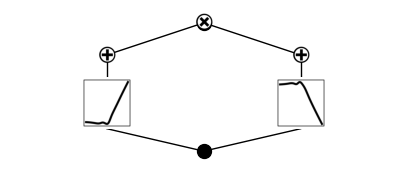

In [19]:
mult_kan = KAN(width=[1, [0, 1]], device=device)
mult_kan(selu_dataset['train_input'])
mult_kan.plot()

In [20]:
mult_kan.fit(selu_dataset, opt='LBFGS', steps=200);

| train_loss: 1.12e-04 | test_loss: 1.14e-04 | reg: 2.82e+00 | : 100%|█| 200/200 [00:08<00:00, 24.01

saving model version 0.1


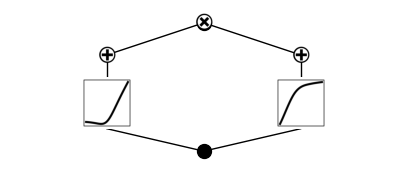

In [21]:
mult_kan.plot()

In [22]:
mult_kan.suggest_symbolic(0, 0, 0);
mult_kan.suggest_symbolic(0, 0, 1);

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1      cos    0.992043 -6.971686           2                2    0.205663
2      sin    0.992043 -6.971686           2                2    0.205663
3      x^2    0.991081 -6.807209           2                2    0.238558
4        x    0.786693 -2.228928           1                1    0.354214
   function  fitting r2    r2 loss  complexity  complexity loss  total loss
0         0    0.000000   0.000014           0                0    0.000003
1      tanh    0.999694 -11.627197           3                3    0.074561
2       exp    0.993591  -7.283371           2                2    0.143326
3       x^2    0.990627  -6.735688           2                2    0.252862
4  gaussian    0.999375 -10.621872           3                3    0.275626


In [23]:
mult_kan.fix_symbolic(0, 0, 1, 'tanh')
mult_kan.fix_symbolic(0, 0, 0, 'x') # if only assign tanh it doesn't work

r2 is 0.9996938705444336
saving model version 0.2
r2 is 0.7866928577423096
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.3


tensor(0.7867)

In [24]:
mult_kan.fit(selu_dataset, opt='LBFGS', steps=200);

| train_loss: 1.59e-07 | test_loss: 1.53e-07 | reg: 0.00e+00 | : 100%|█| 200/200 [00:07<00:00, 27.91

saving model version 0.4


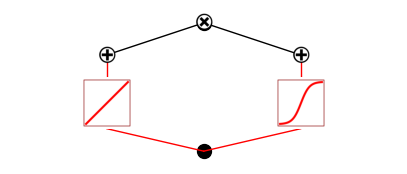

In [25]:
mult_kan.plot()

In [26]:
ex_round(mult_kan.symbolic_formula()[0][0], 3)

2.804*x_1*(0.178*tanh(0.5*x_1) + 0.178)